In [78]:
from pyagender import PyAgender
import os, fnmatch, facemorpher
from pyagender import PyAgender
import cv2

agender = PyAgender()
x = os.getcwd()
detected_age = []
actual_age = []
path = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/"


def age_det(name):
    faces = agender.detect_genders_ages(cv2.imread(name))
    #print(faces)
    age = faces[0]['age']
    return age


x = os.getcwd()

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
        
def find2(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

f = open('/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/subjects.csv', 'r')
for row in f:
    data = (row.split(" "))
    data_split = (str(data).replace('"', ',').split(","))
    number = data_split[0].replace('\\t','').replace("'", "").replace('[', '')
    age = data_split[4].replace('\\t','')
    path = find(number,x)
    #print(path)
    if str(path) != "None":
        z = find2('*.jpg', path)
        picture = (str(z[0]))
        #print(picture)
        age_detected = age_det(picture)
        detected_age.append(int(age_detected))
        actual_age.append(int(age))
#age = age_det()

NameError: name 'np' is not defined

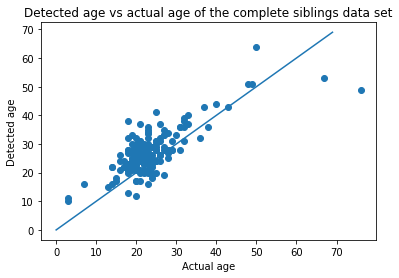

In [77]:
import numpy
import matplotlib.pyplot as plt
actual_age_arr = numpy.array(actual_age)
detected_age_arr = numpy.array(detected_age)

plt.scatter(actual_age_arr, detected_age_arr)
plt.xlabel('Actual age')
plt.ylabel('Detected age')
plt.title("Detected age vs actual age of the complete siblings data set")
plt.plot(range(0, 70))
plt.savefig('actual-detect-SB.png')
